In [1]:
from abel import *
%load_ext autoreload
%autoreload 2

/users/lindstrm/.abelconfig.toml
Loading ABEL config from '/users/lindstrm/.abelconfig.toml'


In [13]:
facet2 = FACET2()
facet2.energy = 10.1e9
facet2.charge = 1.6e-9
facet2.plasma_length = 0.05
facet2.plasma_density = 2e22
facet2.nom_accel_gradient = 0.0
facet2.stage_class = StageHipace
facet2.num_nodes = 16

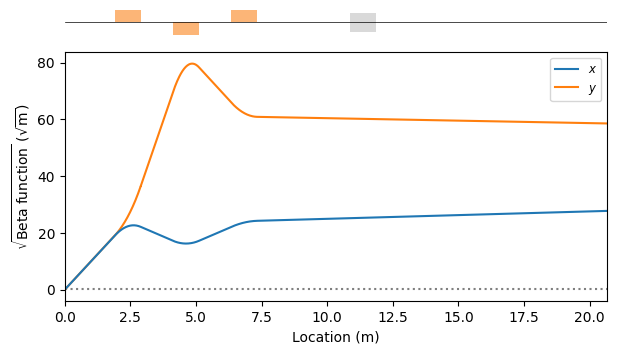

In [14]:
facet2.imaging_energy = 9e9
facet2.magnification_x = -9.0
facet2.assemble_trackables()
facet2.spectrometer.set_imaging()
facet2.spectrometer.plot_optics()

In [15]:
facet2.run('facet2_test3', overwrite=True, parallel=True, num_shots=48)

Tracked #0  SourceBasic             (s =    0.0 m) :   E =   0.0 GeV, Q = -1.60 nC, σz =  35.0 µm, σE =  1.0%, ε =   5.0/5.0 mm-mrad
    ... #1  RFAcceleratorBasic      (s =  900.0 m) :   E =  10.1 GeV, Q = -1.60 nC, σz =  35.0 µm, σE =  0.0%, ε =   5.0/5.0 mm-mrad
    ... #2  BeamDeliverySystemBasic (s = 1000.0 m) :   E =  10.1 GeV, Q = -1.60 nC, σz =  35.0 µm, σE =  0.0%, ε =   5.0/5.0 mm-mrad
>> Finished HiPACE++ (job 12722731): 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 190/190 [00:46<00:00,  4.09 steps/s]
    ... #3  StageHipace #1          (s = 1000.0 m) :   E =   9.9 GeV, Q = -1.60 nC, σz =  35.0 µm, σE =  0.7%, ε =  21.7/6.4 mm-mrad
    ... #4  SpectrometerFACET2      (s = 1020.7 m) :   E =   9.9 GeV, Q = -1.60 nC, σz =  36.1 µm, σE =  0.7%, ε =  31.3/1315.4 mm-mrad


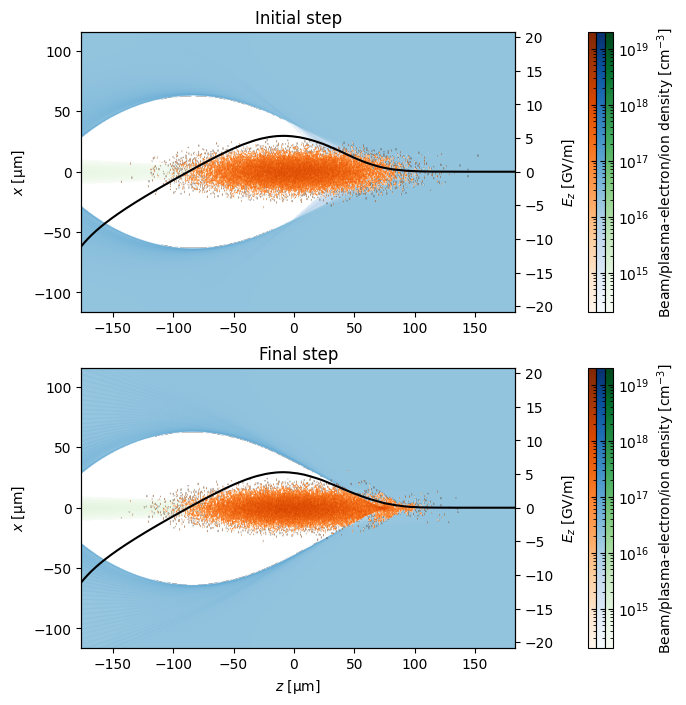

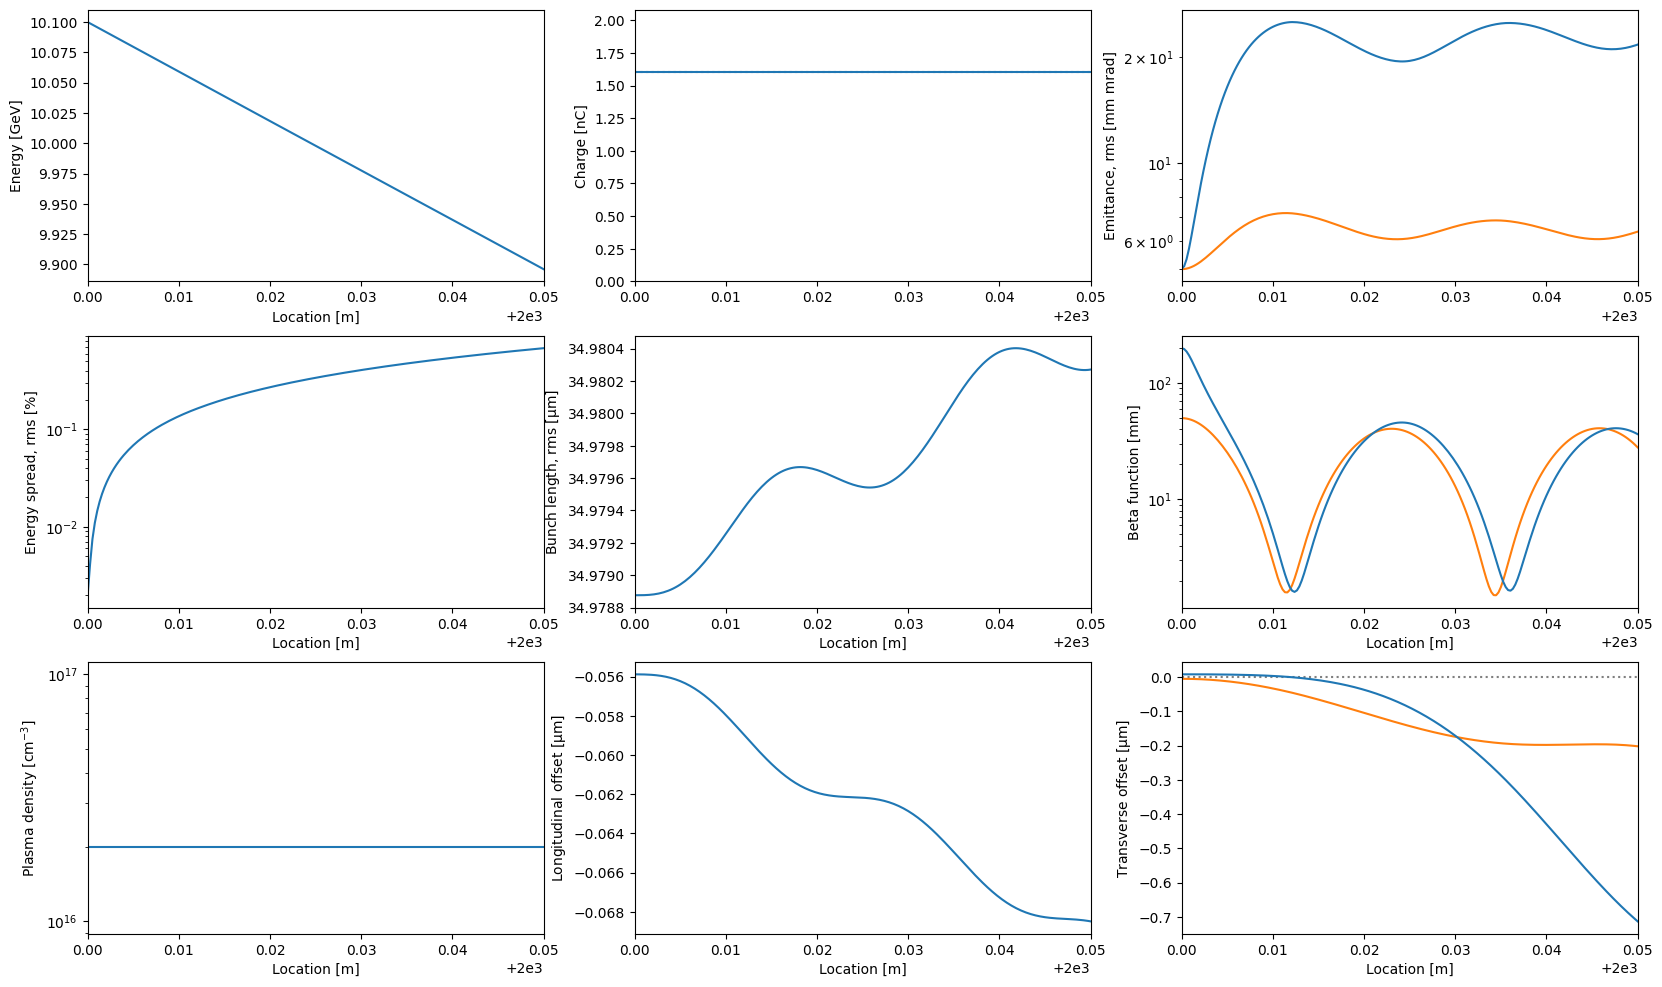

In [16]:
facet2.stage.plot_wake()
facet2.stage.plot_evolution()

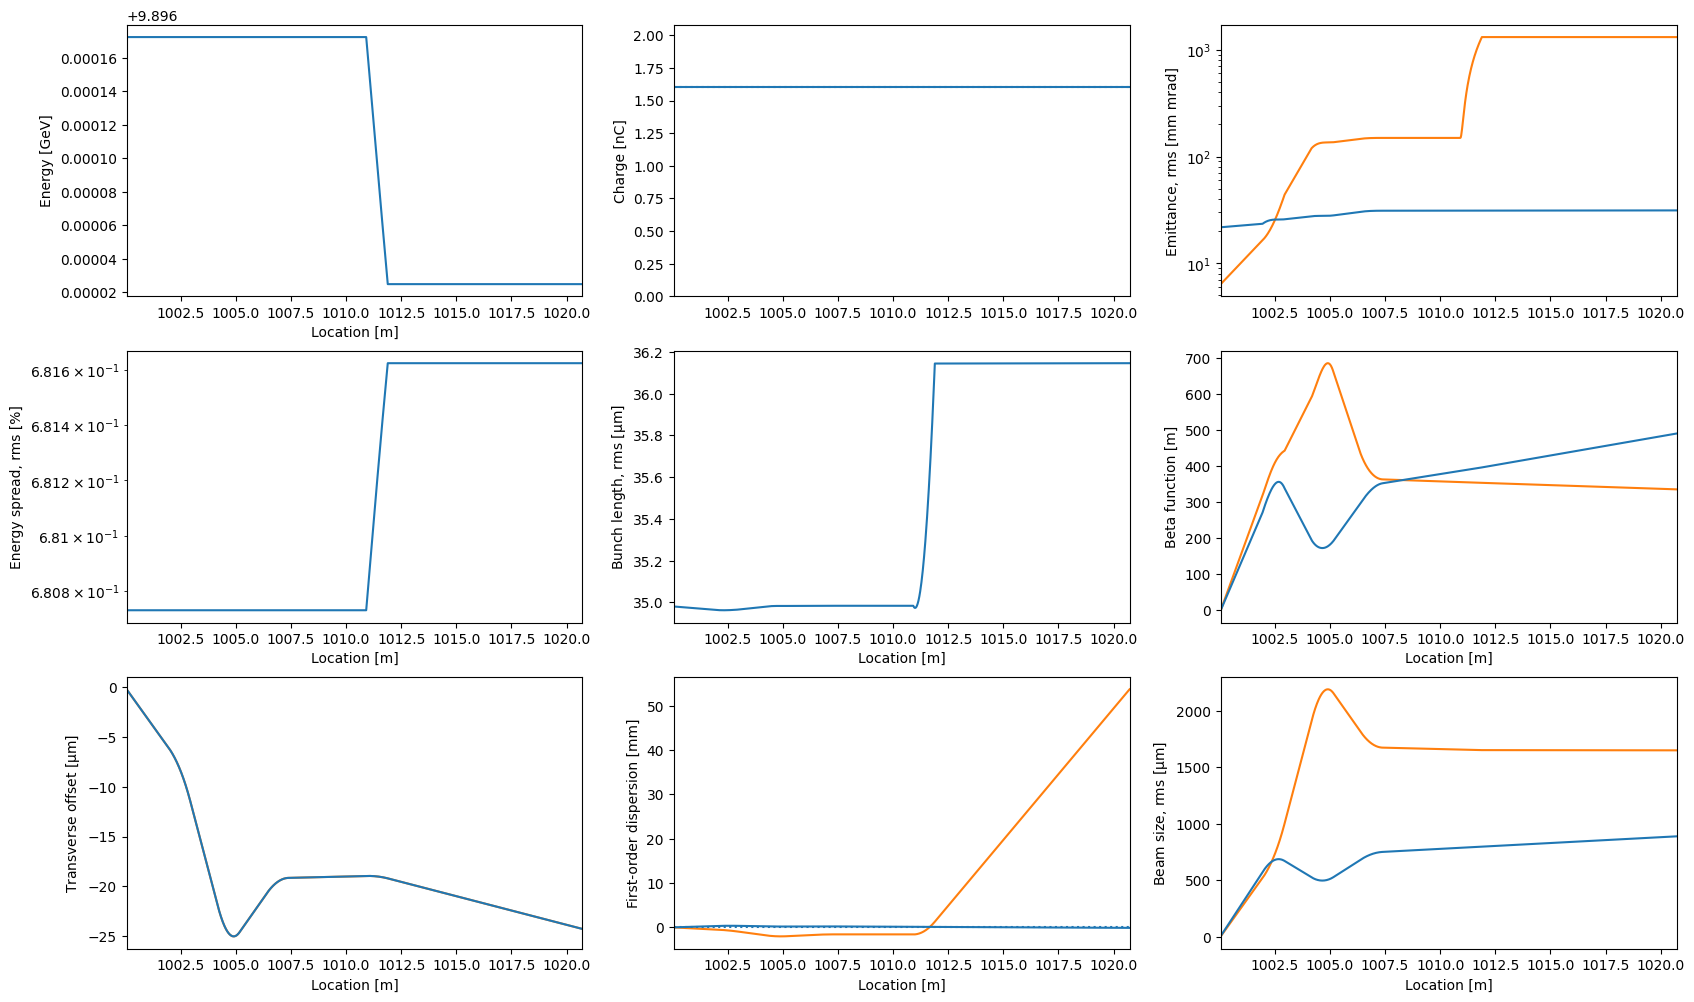

In [17]:
facet2.spectrometer.plot_evolution()

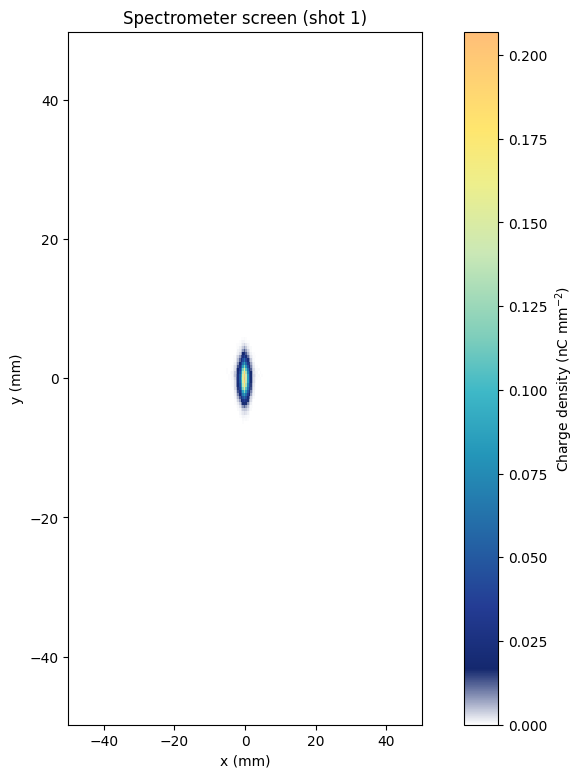

In [18]:
facet2.plot_spectrometer_screen(xlims=[-50e-3, 50e-3], ylims=[-50e-3, 50e-3])

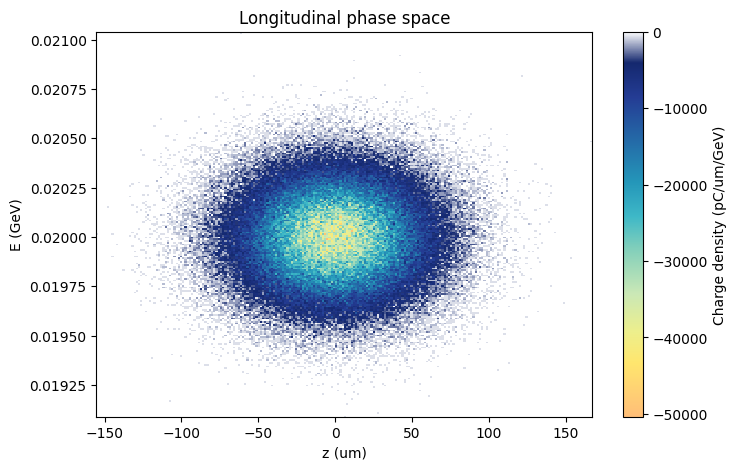

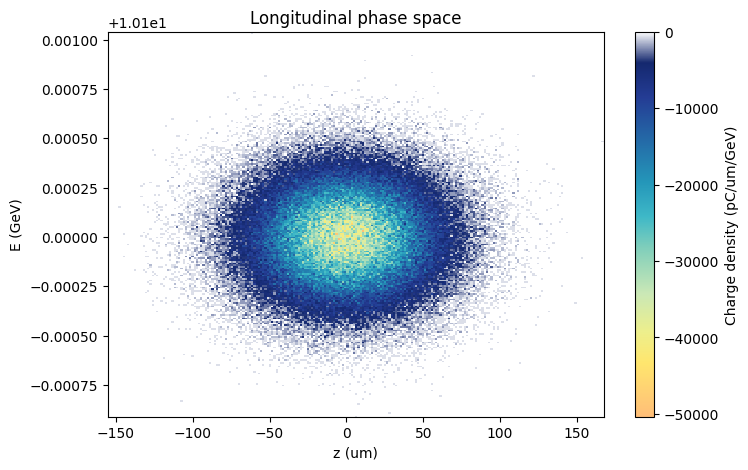

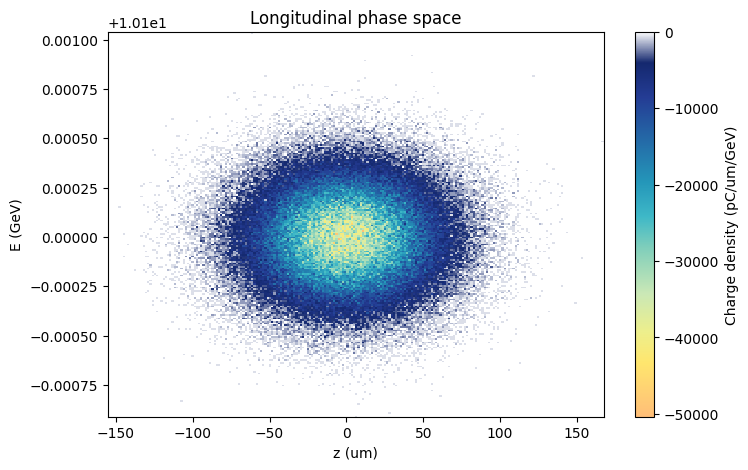

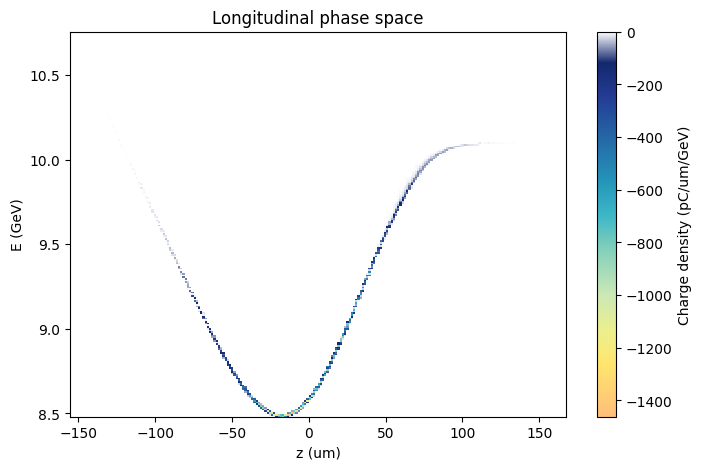

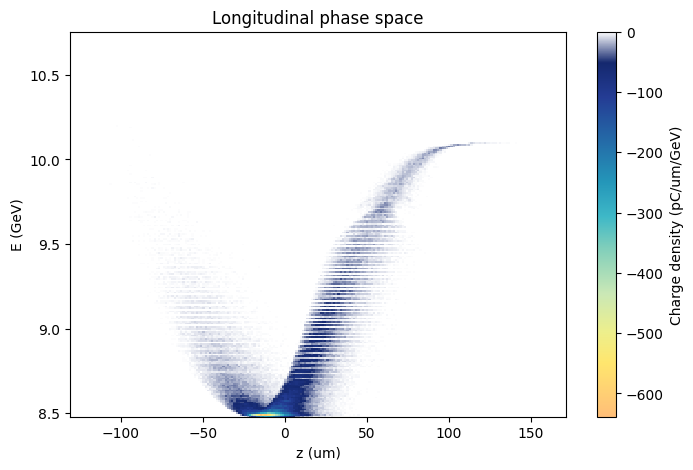

In [8]:
for i in range(facet2.num_outputs()):
    facet2.get_beam(i).plot_lps()

In [9]:
return
facet2.scan('facet2_scan_example', 
           lambda obj, val: setattr(obj, 'charge', val) or obj, 
           np.logspace(np.log10(1e-12), np.log10(10e-9), 16),
           label='Charge (nC)',
           scale=1e-9,
           num_shots_per_step=1, 
           parallel=True,
           overwrite=True)

SyntaxError: 'return' outside function (3397168687.py, line 1)